# 第四章 非参数滤波

## 1. 对前面章节讨论的线性系统进行直方图滤波

### a). 对3.1的动态系统进行直方图滤波，绘制$t=1,2,...,5$每个时刻的$x,\dot{x}$联合概率分布

根据3.1的分析，可以得到

$$
\begin{align}
A&=\begin{bmatrix}1 &1\\0 &1 \end{bmatrix} \\
B&=\begin{bmatrix}\frac{1}{2} \\1 \end{bmatrix} \\
R&=\begin{bmatrix}\frac{1}{4} &\frac{1}{2}\\\frac{1}{2} &1 \end{bmatrix} + \begin{bmatrix}1 &1\\1 &1 \end{bmatrix}\times 10^{-5}
\end{align}
$$

注：其中协方差矩阵 $R$ 是奇异矩阵不可逆，为计算高斯分布的概率，需要在该矩阵上加小量使其可逆

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = np.mat([[1, 1],[0, 1]])
B = np.mat([[0.5], [1.0]])
mu = np.mat([[0],[0]])
R = B*B.T + np.ones(2)*1e-5

为进行直方图滤波，首先需要对状态空间进行离散化，这里将$\begin{bmatrix} x \\ \dot{x} \end{bmatrix} $ 划分在 $-10\sim 10$ 的空间，步长取 $0.25$，时刻$t$的概率分布由下式给定

$$
\begin{align}
p(x_t)=\sum_{x_{min}}^{x_{max}}\sum_{\dot{x}_{min}}^{\dot{x}_{max}}p(x_t|x_{t-1})*p(x_{t-1})
\end{align}
$$

其中状态转移函数$p(x_t|x_{t-1})$与3.1中一致，系统初始概率分布由 $\Sigma_0=\begin{bmatrix}10^{-10} &0\\0 &10^{-10} \end{bmatrix}$ 确定

(40, 40)
figure 0
figure 1
figure 2
figure 3
figure 4
figure 5


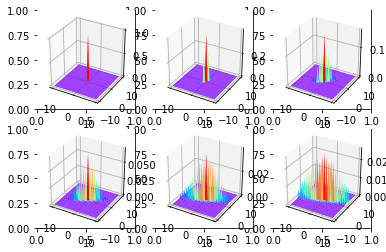

In [2]:
Sigma_0 = np.mat([[1e-10, 0],[0, 1e-10]])

delta = 0.5
X_max = 10
X_dot_max = 10
X_min = -10
X_dot_min = -10

X=np.arange(X_min, X_max, delta)
X_dot=np.arange(X_dot_min, X_dot_max, delta)
X, X_dot=np.meshgrid(X, X_dot)
P=np.ones(X.shape)/((X_max-X_min)/delta*(X_dot_max-X_dot_min)/delta)
#initialize P_0
sum = 0.0
for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            X_0=np.mat([[X[i][j]], [X_dot[i][j]]])
            P[i][j]=math.pow(math.e, -1.0/2.0 * X_0.T * Sigma_0.I * X_0)
            sum+=P[i,j]

P = P/sum
print(X.shape)

fig,ax = plt.subplots(2,3)

#from time 0 to 5
for i in range(6):
    print("figure", i)
    ax = fig.add_subplot(2,3,1+i, projection='3d')
    P_bar=np.zeros(X.shape)

    # calculate probabilitics
    sum = 0.0
    for i in range(P_bar.shape[0]):
        for j in range(P_bar.shape[1]):
            X_t=np.mat([[X[i][j]], [X_dot[i][j]]])
            for i_t_1 in range(P.shape[0]):
                for j_t_1 in range(P.shape[1]):
                    X_t_1=np.mat([[X[i_t_1,j_t_1]], [X_dot[i_t_1,j_t_1]]])
                    P_bar[i][j]+=math.pow(math.e, -1.0/2.0 * (X_t-A*X_t_1).T * R.I * (X_t-A*X_t_1))*P[i_t_1, j_t_1]
            sum+=P_bar[i][j]
    P_bar=P_bar/sum

    ax.plot_surface(X, X_dot, P, rstride=1, cstride=1, cmap='rainbow')
    P = P_bar

plt.show()

### b). 对3.2的观测步骤进行直方图滤波，对比观测更新前和更新后的概率分布

根据3.2 可以得到观测矩阵以及观测概率函数
$$
\begin{align}
C &= \begin{bmatrix} 1 &0 \end{bmatrix} \\
Q &= 10 \\
p(z_t|x_t) &\sim N(Cx_t, Q)
\end{align}
$$
通过测量跟新可以得到新的概率分布如下

In [3]:
C = np.mat([1, 0])
Q = np.mat([10])
Z = 5
P_z = np.zeros(P.shape)
sum = 0.0
for i in range(P_z.shape[0]):
    for j in range(P_z.shape[1]):
        X_t=np.mat([[X[i][j]], [X_dot[i][j]]])
        P_z[i,j] = math.pow(math.e, -1.0/2.0 * (Z-C*X_t).T * Q.I * (Z-C*X_t))*P[i, j]
        sum+=P_z[i,j]
P_z=P_z/sum

fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(X, X_dot, P_z, rstride=1, cstride=1, cmap='rainbow')
plt.show()